
Note: the first part of this file is largely based on [A quick tour of GA](https://luca-scr.github.io/GA/articles/GA.html) by Luca Scrucca.

# Introduction

Genetic algorithms (GAs) are stochastic search algorithms inspired by the basic principles of biological evolution, genetics and natural selection. GAs simulate the evolution of living organisms --where the fittest individuals (tend to) dominate over the weaker ones-- by mimicking the biological mechanisms of evolution, such as selection, crossover and mutation.

The R package **GA** provides a collection of general purpose functions for optimization using genetic algorithms. The package includes a flexible set of tools for implementing genetic algorithms search in both the continuous and discrete case, whether constrained or not. Users can easily define their own objective function depending on the problem at hand. Several genetic operators are available and can be combined to explore the best settings for the current task. Furthermore, users can define new genetic operators and easily evaluate their performance. Local search using general-purpose optimisation algorithms can be applied stochastically to exploit interesting regions, leading to hybrid schemes; this idea was originally named Lamarckianism. GAs can be run sequentially or in parallel, using an explicit master-slave parallelisation or a coarse-grain islands approach.

This document gives a quick tour of **GA** (version `r packageVersion("GA")`) functionalities. It was written in R Markdown, using the [knitr](https://cran.r-project.org/package=knitr) package for production. Specifically, the [R book page](https://r4ds.had.co.nz/r-markdown.html) provides very good information for other output formats.

Further details about the **GA** package are provided in the papers Scrucca (2013) and Scrucca (2017). See also `help(package="GA")` for a list of available functions and methods. 

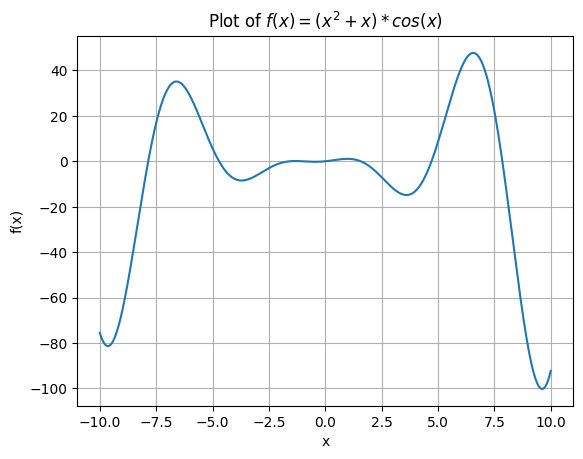

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 + x) * np.cos(x)

lbound, ubound = -10, 10
x_values = np.linspace(lbound, ubound, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = (x^2 + x) * cos(x)$')
plt.grid(True)
plt.show()

In [108]:
LOWER_BOUND = -10
UPPER_BOUND = 10
POPULATION_SIZE = 100

def generate_individual(lbound, ubound):
    return np.random.uniform(lbound, ubound)

def generate_population(size, lbound, ubound):
    return np.array([generate_individual(lbound, ubound) for _ in range(size)])

def fitness(individual):
    return (individual**2 + individual) * np.cos(individual)

def evaluate_population(fitness, population):
    return np.array([fitness(individual) for individual in population])

def roulette_selection(fitness, population, r):
    ls_fitness = evaluate_population(fitness, population)
    dif_fitness = ls_fitness - np.min(ls_fitness)
    if np.sum(dif_fitness) > 0:
        rel_fitness = dif_fitness / np.sum(dif_fitness)
    else:
        rel_fitness = ls_fitness / len(dif_fitness)

    cum_rel = np.cumsum(rel_fitness)
    roulette = [len(cum_rel[cum_rel < r_i]) for r_i in r]
    pop_out = population[roulette]
    return pop_out

def ranking_selection(fitness, population, r):
    ls_fitness = evaluate_population(fitness, population)
    ls_rank = len(ls_fitness) - np.argsort(ls_fitness)[::-1]
    rank_ratio = 2 * ls_rank / (len(pop)*(len(pop) + 1))
    cum_ratio = np.cumsum(rank_ratio)
    ranking_sel = [len(cum_ratio[cum_ratio < r_i]) for r_i in r]
    # print(ls_rank)
    # print(rank_ratio)
    # print("R:", r)
    # print("RANKING", ranking_sel)
    # print("Cumratio", cum_ratio)
    pop_out = population[ranking_sel]
    return pop_out

def tournament_selection(fitness, population, n_players=2):
    from itertools import combinations
    n = len(population)
    tourn = np.array(list(combinations(range(n), n_players)))
    random_tourn_idx = np.random.choice(len(tourn), size=n, replace=False)
    played_tourns = tourn[random_tourn_idx]
    winners = [x if fitness(population[x]) > fitness(population[x]) else y for (x, y) in played_tourns]
    pop_out = population[winners]
    return pop_out


def select(fitness, population, method="roulette", n_players=2):
    n = len(population)
    r = np.random.uniform(0, 1, n)
    if method == "roulette":
        return roulette_selection(fitness, population, r)
    elif method == "tournament":
        return tournament_selection(fitness, population, n_players)
    elif method == "ranking":
        return ranking_selection(fitness, population, r)
    else:
        raise ValueError("Invalid selection method: " + method)

np.random.seed(0)
pop = generate_population(5, -10, 10)
print("Population")
print(pop)
print(fitness(pop))
r = np.random.uniform(0, 1, len(pop))
print("Randomize Selection")
print(r)
print()

generations = 10
np.random.seed(0)
pop = generate_population(20, -10, 10)
for i in range(generations):
    print(f"\n\nGENERATION {i}")
    roul_out = select(fitness, pop, method="roulette")
    tour_out = select(fitness, pop, method="tournament")
    rank_out = select(fitness, pop, method="ranking")

    print("ROULETTE:", np.max(fitness(roul_out)))
    print("TOURNAMENT:", np.max(fitness(tour_out)))
    print("RANKING:", np.max(fitness(rank_out)))

    arr_out = np.array([roul_out, tour_out, rank_out])
    fitness_out = np.array([np.max(fitness(x)) for x in arr_out])
    new_pop = arr_out[np.argmax(fitness_out)]
    
    pop = new_pop
    


Population
[ 0.97627008  4.30378733  2.05526752  0.89766366 -1.52690401]
[ 1.08067356 -9.06952244 -2.92456705  1.06200467  0.03530143]
Randomize Selection
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]



GENERATION 0
ROULETTE: 47.47628311640269
TOURNAMENT: 35.9289235322158
RANKING: 35.9289235322158


GENERATION 1
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.47628311640269


GENERATION 2
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.47628311640269


GENERATION 3
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.47628311640269


GENERATION 4
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.47628311640269


GENERATION 5
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.47628311640269


GENERATION 6
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.47628311640269


GENERATION 7
ROULETTE: 47.47628311640269
TOURNAMENT: 47.47628311640269
RANKING: 47.4762

In [95]:
3 - np.argsort([23, 30, 5, 5])[::-1]

array([2, 3, 0, 1], dtype=int64)

In [76]:
from itertools import combinations
list(combinations(range(4), 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [35]:
arr = [23, 30, 5]
sorted_arr = np.sort(arr)
[arr.index(x) + 1 for x in sorted_arr[::-1]]

[2, 1, 3]

In [16]:
# Roulette Selection

np.random.seed(0)
pop = generate_population(5, -10, 10)
print("Population")
print(pop)
print()
print("Fitness of the population")
f_pop = fitness(pop)
dif_f_pop = f_pop - np.min(f_pop)
print(f_pop)
print()

print("Cumsum")
print(np.cumsum(dif_f_pop / np.sum(dif_f_pop)))
print()

r = np.random.uniform(0, 1, len(pop))
print("Randomize Selection")
print(r)
print()
roulette = roulette_selection(fitness, pop, r)
print(roulette)

Population
[ 0.97627008  4.30378733  2.05526752  0.89766366 -1.52690401]

Fitness of the population
[ 1.08067356 -9.06952244 -2.92456705  1.06200467  0.03530143]

Cumsum
[0.28566752 0.28566752 0.45861138 0.74375348 1.        ]

Randomize Selection
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]

[3, 2, 4, 4, 2]
